In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
df=pd.read_csv("udemy.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [4]:
df["content_duration"]=df["content_duration"].astype('int')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3678 non-null   int64 
 1   course_title         3678 non-null   object
 2   url                  3678 non-null   object
 3   is_paid              3678 non-null   bool  
 4   price                3678 non-null   int64 
 5   num_subscribers      3678 non-null   int64 
 6   num_reviews          3678 non-null   int64 
 7   num_lectures         3678 non-null   int64 
 8   level                3678 non-null   object
 9   content_duration     3678 non-null   int64 
 10  published_timestamp  3678 non-null   object
 11  subject              3678 non-null   object
dtypes: bool(1), int64(6), object(5)
memory usage: 319.8+ KB


In [6]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [7]:
df.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2,2016-12-13T14:57:18Z,Business Finance


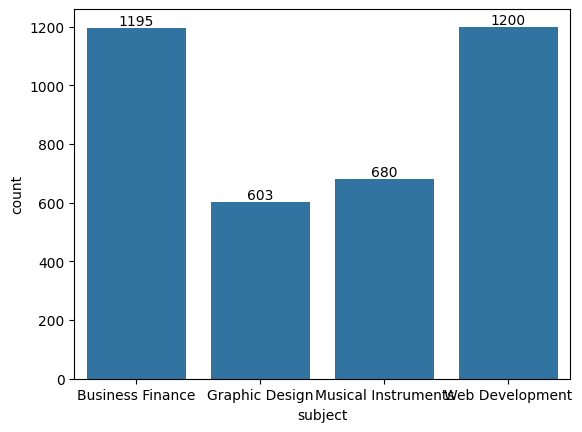

In [8]:
ax=sb.countplot(x="subject",data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [9]:
df["ratings"] = (df["num_reviews"] / df["num_subscribers"]) * 100
# Calculate correlation (Pearson by default)
correlation = df['price'].corr(df['ratings'])

print(f"The correlation coefficient between column1 and column2 is: {correlation}")


The correlation coefficient between column1 and column2 is: 0.03269403249321625


In [10]:
#as correlation is close to 0, then it means that there is no correlaton b/w price and ratings

Completion Proxy by Course Level:
 level
All Levels            6.861510
Beginner Level        6.535958
Expert Level          7.007469
Intermediate Level    7.741807
Name: completion_proxy, dtype: float64

Completion Proxy Trends Over Time:
 published_timestamp
2011    3.245361
2012    4.038471
2013    4.857704
2014    5.483923
2015    5.841556
2016    8.103052
2017    7.968174
Name: completion_proxy, dtype: float64


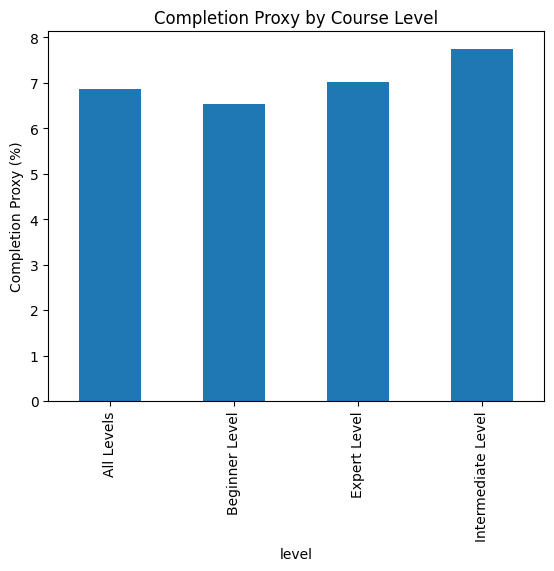

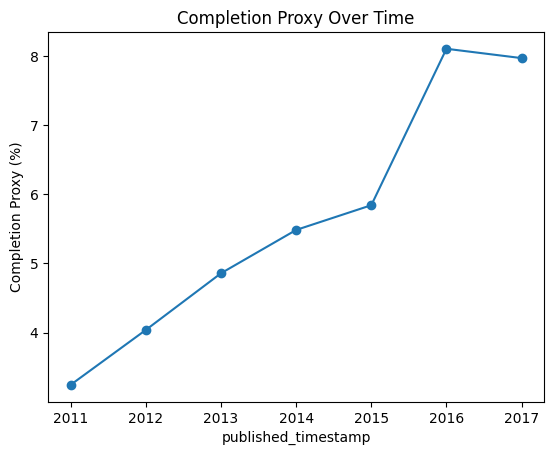

In [11]:
# Convert published_timestamp to datetime
df["published_timestamp"] = pd.to_datetime(df["published_timestamp"])

# Calculate completion proxy
df["completion_proxy"] = (df["num_reviews"] / df["num_subscribers"]) * 100

# Analyze trends
completion_by_level = df.groupby("level")["completion_proxy"].mean()
completion_over_time = df.groupby(df["published_timestamp"].dt.year)["completion_proxy"].mean()

print("Completion Proxy by Course Level:\n", completion_by_level)
print("\nCompletion Proxy Trends Over Time:\n", completion_over_time)

# Visualize trends
import matplotlib.pyplot as plt

# Completion Proxy by Level
completion_by_level.plot(kind="bar", title="Completion Proxy by Course Level", ylabel="Completion Proxy (%)")
plt.show()

# Completion Proxy Over Time
completion_over_time.plot(kind="line", marker="o", title="Completion Proxy Over Time", ylabel="Completion Proxy (%)")
plt.show()

Performance by Course Level:
 level
All Levels            6.861510
Beginner Level        6.535958
Expert Level          7.007469
Intermediate Level    7.741807
Name: completion_proxy, dtype: float64

Performance by Price Range:
 price_range
0-50       7.182342
51-100     7.000745
101-150    9.078258
151-200    6.641885
Name: completion_proxy, dtype: float64

Performance by Number of Lectures:
 num_lectures
0            NaN
4       4.201827
5       8.727346
6       9.180374
7       7.670832
         ...    
491     0.721121
527     6.594539
536    17.102138
544    18.243243
779     0.643919
Name: completion_proxy, Length: 229, dtype: float64

Performance by Content Duration:
 content_duration
0      8.055761
1      5.722778
2      6.266617
3      6.636314
4      6.767921
5      7.695517
6      7.540124
7      8.175258
8      8.286161
9      9.486558
10     9.221840
11     8.747598
12    12.163799
13     9.059230
14     8.094110
15     8.916548
16    11.578895
17     5.769808
18     8.64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13852\2260336255.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_by_price = df.groupby("price_range")["completion_proxy"].mean()


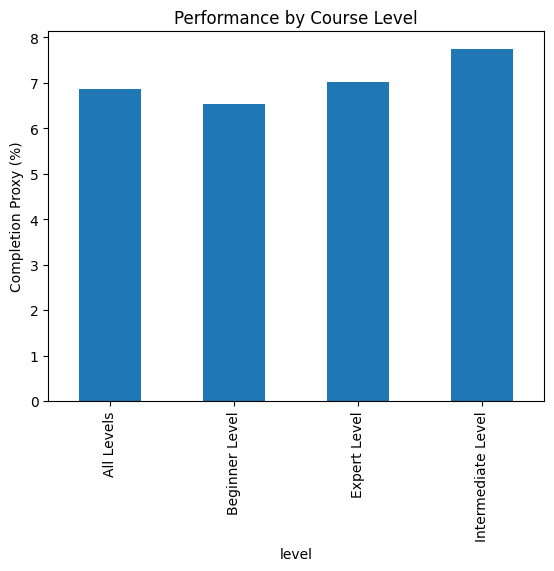

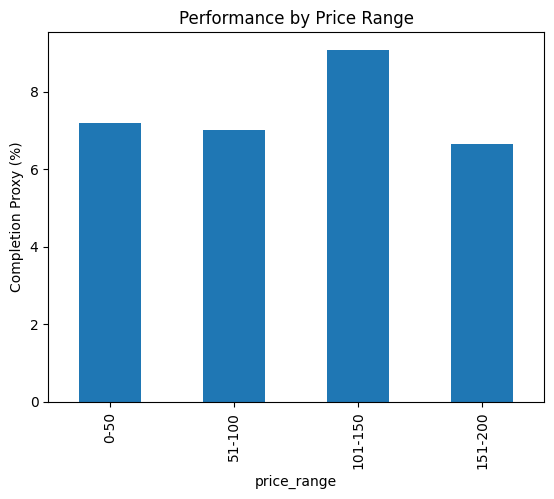

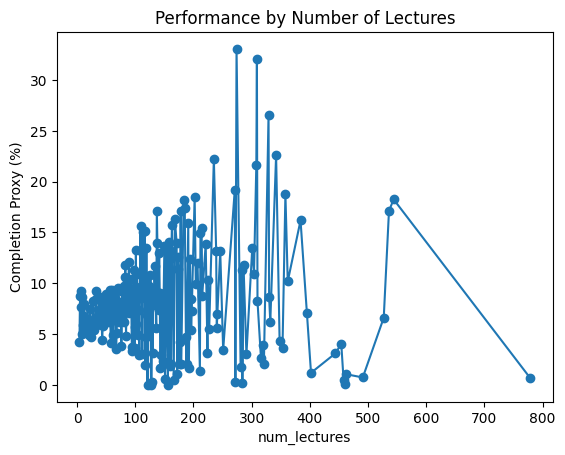

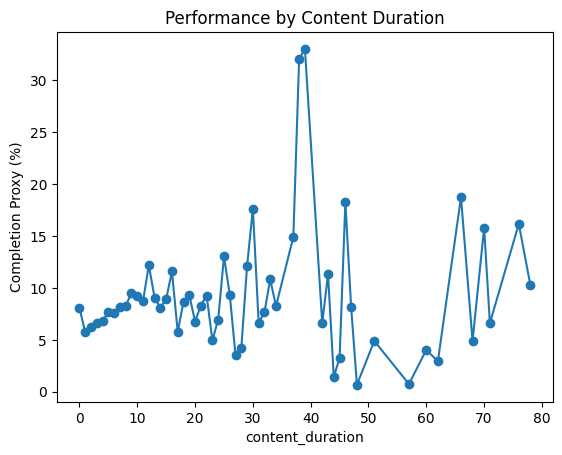

In [12]:
# 1. Performance by Course Level
performance_by_level = df.groupby("level")["completion_proxy"].mean()

# 2. Performance by Price Range
df["price_range"] = pd.cut(df["price"], bins=[0, 50, 100, 150, 200], labels=["0-50", "51-100", "101-150", "151-200"])
performance_by_price = df.groupby("price_range")["completion_proxy"].mean()

# 3. Performance by Number of Lectures
performance_by_lectures = df.groupby("num_lectures")["completion_proxy"].mean()

# 4. Performance by Content Duration
performance_by_duration = df.groupby("content_duration")["completion_proxy"].mean()

# Print results
print("Performance by Course Level:\n", performance_by_level)
print("\nPerformance by Price Range:\n", performance_by_price)
print("\nPerformance by Number of Lectures:\n", performance_by_lectures)
print("\nPerformance by Content Duration:\n", performance_by_duration)

# Visualizations
import matplotlib.pyplot as plt

# Performance by Level
performance_by_level.plot(kind="bar", title="Performance by Course Level", ylabel="Completion Proxy (%)")
plt.show()

# Performance by Price Range
performance_by_price.plot(kind="bar", title="Performance by Price Range", ylabel="Completion Proxy (%)")
plt.show()

# Performance by Number of Lectures
performance_by_lectures.plot(kind="line", marker="o", title="Performance by Number of Lectures", ylabel="Completion Proxy (%)")
plt.show()

# Performance by Content Duration
performance_by_duration.plot(kind="line", marker="o", title="Performance by Content Duration", ylabel="Completion Proxy (%)")
plt.show()


In [14]:
df["region"] = ["North America", "Asia", "Europe", "Asia", "North America"]

# Calculate completion proxy (%)
df["completion_proxy"] = (df["num_reviews"] / df["num_subscribers"]) * 100

# Visualize engagement by region
df.plot(x="region", y="completion_proxy", kind="bar", title="Engagement by Region", ylabel="Completion Proxy (%)", legend=False)
plt.show()

ValueError: Length of values (5) does not match length of index (3678)

In [15]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,ratings,completion_proxy,price_range
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1,2017-01-18 20:58:58+00:00,Business Finance,1.071262,1.071262,151-200
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39,2017-03-09 16:34:20+00:00,Business Finance,33.058739,33.058739,51-100
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2,2016-12-19 19:26:30+00:00,Business Finance,3.403864,3.403864,0-50
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3,2017-05-30 20:07:24+00:00,Business Finance,0.448796,0.448796,51-100
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2,2016-12-13 14:57:18+00:00,Business Finance,3.526646,3.526646,151-200


In [ ]:
ax=sb.countplot(x="is_paid",data=df)

#more people are engaged in paid courses

ax=sb.countplot(x="level",data=df)
for bars in ax.containers: 
    ax.bar_label(bars)

#more people are engaged in persuing course that is eligible for all levels 

sb.set(rc={"figure.figsize":(15,5)})
ax=sb.countplot(x="content_duration",data=df)
for bars in ax.containers: 
    ax.bar_label(bars)

#more people are engaged in 1 hr duration courses

sb.set(rc={"figure.figsize":(15,5)})
ax=sb.countplot(x="subject",data=df)
for bars in ax.containers: 
    ax.bar_label(bars)

#more people are engaged in courses realted to web development

sb.set(rc={"figure.figsize":(15,5)})
ax=sb.countplot(x="price_range",data=df)
for bars in ax.containers: 
    ax.bar_label(bars)

#more people are engaged in courses of price between 0-50